In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np
from utils.plot import *

In [120]:
KEY_AOA = "AUXDATA Common.AngleOfAttack"
KEY_MACH = "AUXDATA Common.ReferenceMachNumber"

INDEX = [0, 1, 4, 5, 8]

def to_floats(line):
    return [float(x) for x in line.strip().split()]

def read_file(filename):
    zones = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("ZONE"):
                settings = {}
                while True:
                    line = f.readline().strip()
                    if line.startswith("DT"): break
                    for pair in line.replace('\n', '').split(','):
                        k, v = pair.split('=')
                        settings[k.strip()] = v.strip()
                aoa = settings[KEY_AOA]
                mach = settings[KEY_MACH]

                I = int(settings.get('I', 1))
                J = int(settings.get('J', 1))
                K = int(settings.get('K', 1))

                zone = []
                for _ in range(I * J * K):
                    zone.append(to_floats(f.readline()))
                zone = np.array(zone).T[INDEX].reshape(len(INDEX), K, J, I).squeeze()
                zones.append(zone)
                
    return zones, aoa, mach

def plot_scatter_zone(zone):
    X = zone[[0, 1]]
    print(X.shape)
    x, y = X.reshape(2, -1)
    x0, y0 = X[:, 0].reshape(2, -1)
    x1, y1 = X[:, :, 0].reshape(2, -1)
    plt.scatter(x, y)
    plt.scatter(x0, y0, label="1")
    plt.scatter(x1, y1, label="2")

def plot_field_zone(zone, **kwargs):
    X = zone[[0, 1]]
    fields = zone[2:][None]
    print(fields.shape)
    plot_fields_quad(X, fields, **kwargs)

In [90]:
path = "datasets/final/93_10_3.45deg.dat"
zones, aoa, mach = read_file(path)


(1, 3, 25, 85)


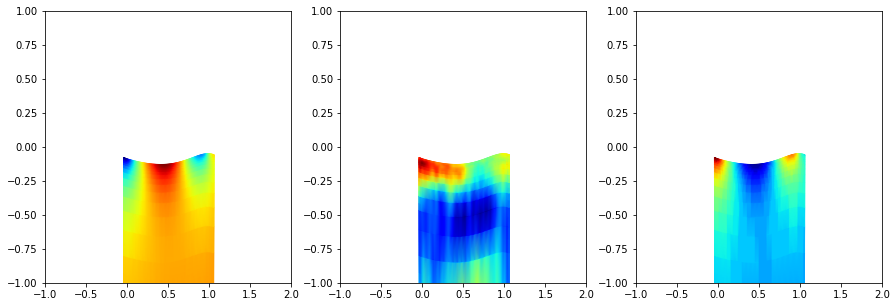

In [108]:
plot_field_zone(zones[1])

(2, 25, 135)


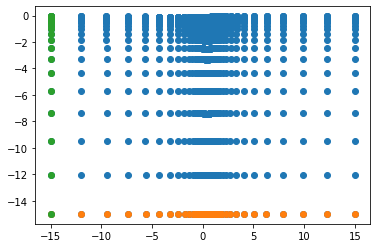

In [96]:
zone_bottom = np.concatenate((zones[0], zones[1], zones[2]), axis=2)
plot_scatter_zone(zone_bottom)

(2, 25, 135)


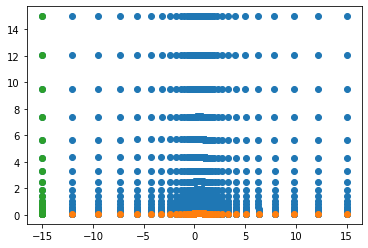

In [99]:
zone_top = np.concatenate((zones[3], zones[4], zones[5]), axis=2)
plot_scatter_zone(zone_top)

(2, 45, 197)


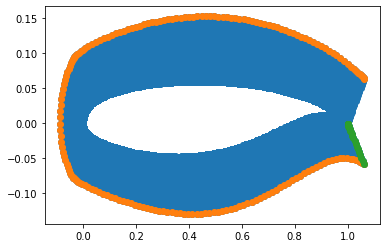

In [101]:
plot_scatter_zone(zones[8])

(2, 45, 226)


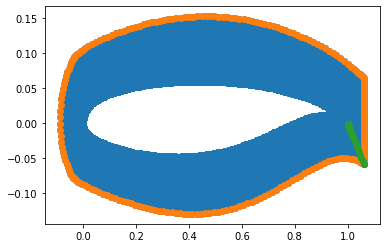

In [117]:
zone_center = np.concatenate((zones[8], np.flip(zones[9], 1)), axis=2)
plot_scatter_zone(zone_center)

(1, 3, 45, 226)


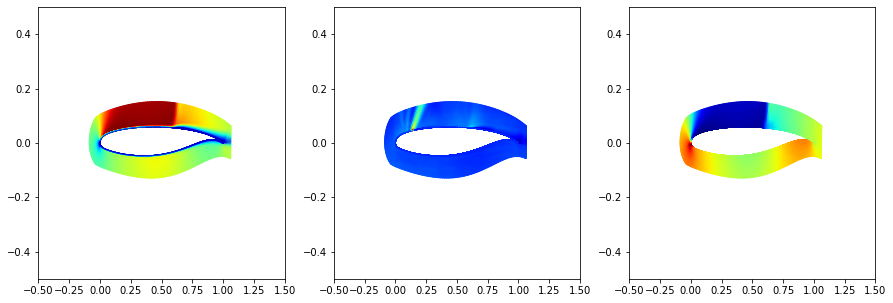

In [122]:
plot_field_zone(zone_center, xlim=(-.5, 1.5), ylim=(-.5, .5))

In [110]:
zones[6].shape, zones[8].shape, np.flip(zones[9], 0).shape

((5, 29, 25), (5, 45, 197), (5, 45, 29))